In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
df.shape

(6362620, 11)

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [22]:
type = df['type'].value_counts()
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [24]:
transaction = type.index
quantity = type.values

In [25]:
import plotly.express as px

In [ ]:
#Distribution of transaction type

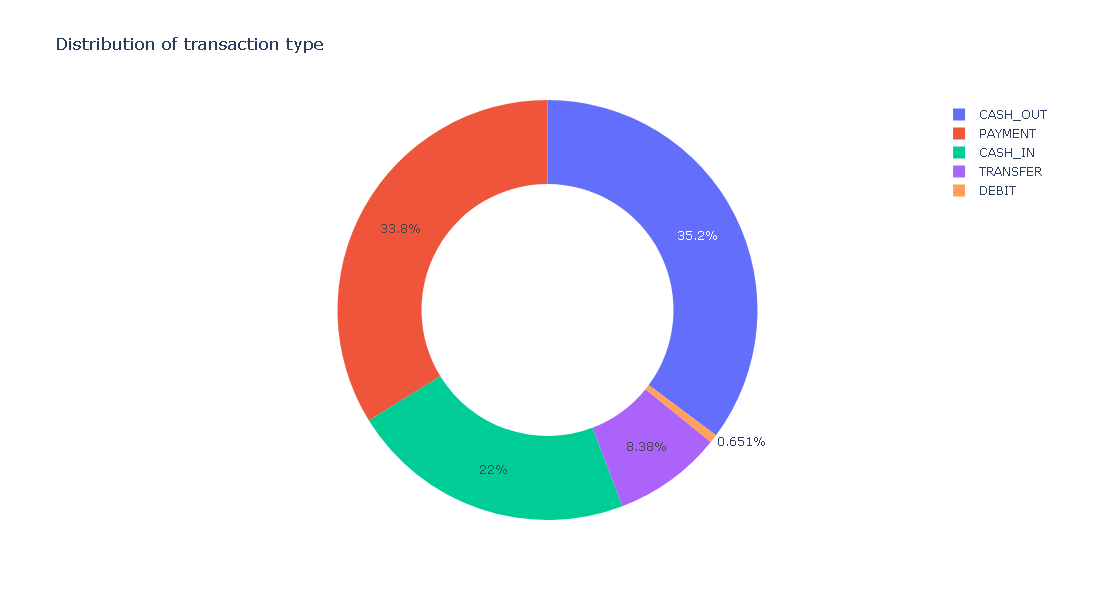

In [44]:
px.pie(df, values = quantity, names = transaction, hole = 0.6, height = 600, title = "Distribution of transaction type")

In [49]:
df.replace(to_replace = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value = [2,4,1,5,3], inplace = True)

In [52]:
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [50]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [54]:
df['isFraud'] = df['isFraud'].map({0:'No fraud', 1:'fraud'})

In [55]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,fraud,0


In [69]:
x = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df.iloc[:,-2]

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [71]:
y

0          No fraud
1          No fraud
2             fraud
3             fraud
4          No fraud
             ...   
6362615       fraud
6362616       fraud
6362617       fraud
6362618       fraud
6362619       fraud
Name: isFraud, Length: 6362620, dtype: object

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 42)

model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [67]:
model.score(xtest, ytest)

0.9997076675960532

In [86]:
model.predict([[2,9800,170136,160296]])

C:\Users\ShwethaShRiVaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No fraud'], dtype=object)

In [93]:
model.predict([[4, 9000.60, 9000.60, 0.0]])

C:\Users\ShwethaShRiVaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['fraud'], dtype=object)